### 01. Import dependencies

In [31]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

### 02.  Load dataset

In [32]:
df = pd.read_csv('../../../EDA/data/processed/Standarlized_data.csv')
df.head()

,Views,Likes,Shares,Comments,Like_Rate,Share_Rate,Comment_Rate,engagement_rate,like_to_comment_ratio,share_to_like_ratio,...,Content_Type_Video,Region_Australia,Region_Brazil,Region_Canada,Region_Germany,Region_India,Region_Japan,Region_UK,Region_USA,Engagement_Level
0,1.056452,0.645129,0.120362,-0.386400,-0.351125,-0.493257,-0.528520,-0.450570,-0.071705,-0.137667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.050638,-0.220268,0.558953,0.167090,-0.635808,-0.356033,-0.403659,-0.650220,-0.104481,-0.100999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,0.672239,0.559503,-0.352247,0.797085,-0.277350,-0.582626,-0.185960,-0.362372,-0.100641,-0.146508,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,-1.451262,-0.834278,-1.308219,0.837968,0.194223,-0.494618,1.791766,0.294857,-0.119598,-0.153519,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.137855,-0.770469,1.286858,1.561859,-0.145863,1.862175,1.497994,0.399544,-0.121509,-0.019479,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
X_pca = df.copy()

### 03. Apply PCA

In [34]:
pca = PCA(n_components=None, random_state=42)
pca_scores = pca.fit_transform(X_pca)

### 04. Explained variance

In [35]:

# Explained variance details
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

variance_df = pd.DataFrame(
    {
        'PC': [f'PC{i+1}' for i in range(len(explained_variance))],
        'Explained_Variance': explained_variance,
        'Cumulative_Variance': cumulative_variance,
    }
)
variance_df.head(10)

,PC,Explained_Variance,Cumulative_Variance
0,PC1,0.279410,0.279410
1,PC2,0.110262,0.389672
2,PC3,0.099254,0.488926
3,PC4,0.081441,0.570367
4,PC5,0.059807,0.630173
5,PC6,0.058406,0.688579
6,PC7,0.043636,0.732215
7,PC8,0.022974,0.755189
8,PC9,0.017493,0.772682
9,PC10,0.016577,0.789259


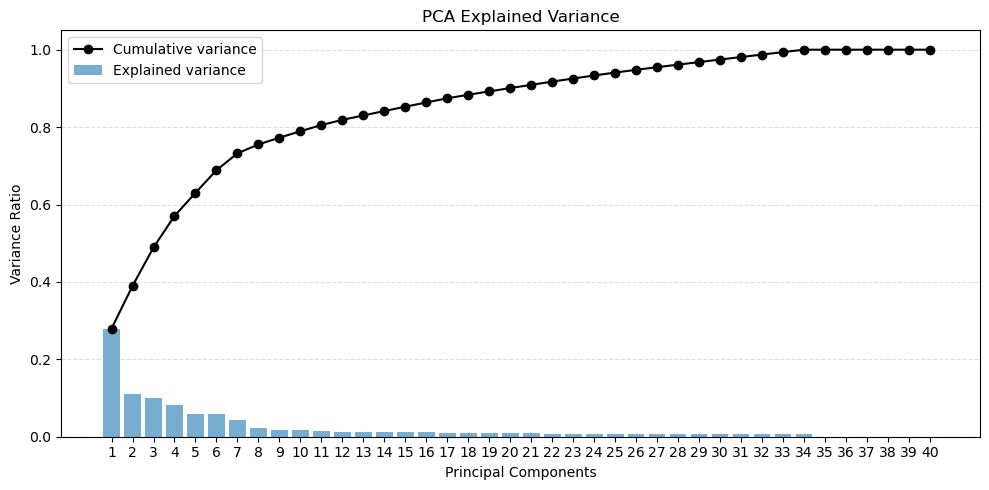

In [36]:
# Plot explained and cumulative variance
plt.figure(figsize=(10, 5))
components = range(1, len(explained_variance) + 1)
plt.bar(components, explained_variance, alpha=0.6, label='Explained variance')
plt.plot(components, cumulative_variance, marker='o', color='black', label='Cumulative variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('PCA Explained Variance')
plt.xticks(components)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

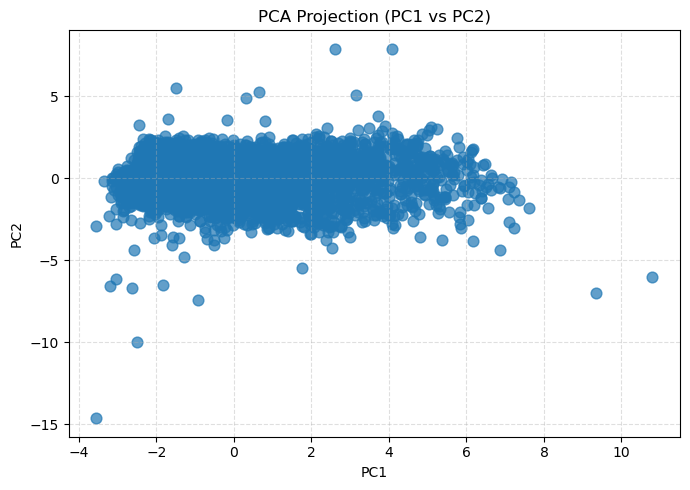

In [37]:
# 2D PCA visualization (first two components)
plt.figure(figsize=(7, 5))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.7, s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (PC1 vs PC2)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

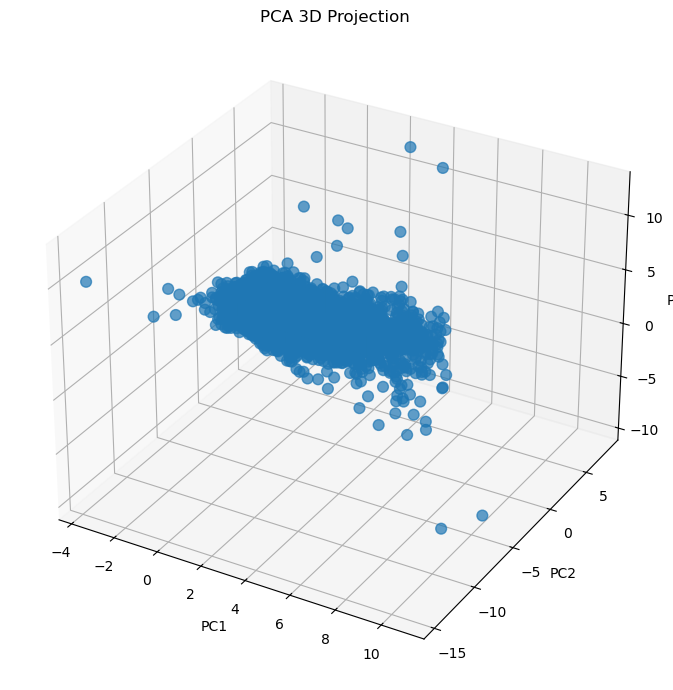

In [38]:
# Optional: simple 3D visualization
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

pca_3d = PCA(n_components=3, random_state=42)
scores_3d = pca_3d.fit_transform(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores_3d[:, 0], scores_3d[:, 1], scores_3d[:, 2], s=60, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Projection')
plt.tight_layout()
plt.show()

### Saving Dataset

In [39]:
# Save first six principal components
n_components_to_save = min(6, pca_scores.shape[1])
pca_top = pd.DataFrame(
    pca_scores[:, :n_components_to_save],
    columns=[f'PC{i+1}' for i in range(n_components_to_save)],
)
output_path = '../data/PCA__components.csv'
pca_top.to_csv(output_path, index=False)
print(f'Saved top {n_components_to_save} principal components to: {output_path}')


Saved top 6 principal components to: ../data/PCA__components.csv


In [40]:
pca_top

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.520799,0.907914,0.250986,0.422042,-0.182105,0.106409
1,-1.776854,-0.022379,0.239353,0.811993,0.174438,-0.192905
2,-1.040347,0.484366,-0.801066,0.688926,0.170580,0.206956
3,1.799679,-1.291960,-2.131554,-1.011562,0.462301,-0.020049
4,2.261563,-2.250236,0.318100,1.302811,0.857018,-0.485186
...,...,...,...,...,...,...
4380,-1.575632,1.507594,0.986220,0.004365,-0.396089,0.047464
4381,-2.745823,0.439693,0.805707,-0.199964,-0.261269,-0.405213
4382,-0.003552,-2.307284,0.485182,0.060607,0.378823,-0.430333
4383,-0.693784,-1.596178,-1.874595,-0.729679,0.682097,-0.232724
